# Operation Mind Shield: Decoding Alzheimer's
#### **Full Name:** Marinath Jeevanantham
#### **Link to SDS Profile:** https://community.superdatascience.com/u/860e4ecc

#### **Mission:** To build predictive models to determine the likelihood of a patient having Alzheimer's based on various features.


#### **Dataset Citation:**
Title: Alzheimer's Disease Dataset

url: https://www.kaggle.com/dsv/8668279

DOI: 10.34740/KAGGLE/DSV/8668279

Publisher: Kaggle

Author: Rabie El Kharoua

Year: 2024

# **DATA CLEANING AND ANALYSIS**

## DATASET LOAD

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
org_data = pd.read_csv('alzheimers_disease_data.csv')
data = org_data

## DATASET INSPECTION

### ***Basic Cleaning***

In [5]:
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [7]:
#Dropping insignificant columns - PatientID, DoctorInCharge
data = data.drop(columns = ['PatientID','DoctorInCharge'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

### ***Feature Split***

In [8]:
# Replace categorical values except the target feature with the actual category.
data['Gender'].replace({0: 'Male', 1: 'Female'}, inplace=True)
data['Ethnicity'].replace({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'}, inplace=True)
data['EducationLevel'].replace({0: 'None', 1: 'High School', 2: "Bachelor's", 3: 'Higher'}, inplace=True)
data['Smoking'].replace({0: 'No', 1: 'Yes'}, inplace=True)
data['FamilyHistoryAlzheimers'].replace({0: 'No', 1: 'Yes'}, inplace=True)
data['CardiovascularDisease'].replace({0: 'No', 1: 'Yes'}, inplace=True)
data['Diabetes'].replace({0: 'No', 1: 'Yes'}, inplace=True)
data['Depression'].replace({0: 'No', 1: 'Yes'}, inplace=True)
data['HeadInjury'].replace({0: 'No', 1: 'Yes'}, inplace=True)
data['Hypertension'].replace({0: 'No', 1: 'Yes'}, inplace=True)
data['MemoryComplaints'].replace({0: 'No', 1: 'Yes'}, inplace=True)
data['BehavioralProblems'].replace({0: 'No', 1: 'Yes'}, inplace=True)
data['Confusion'].replace({0: 'No', 1: 'Yes'}, inplace=True)
data['Disorientation'].replace({0: 'No', 1: 'Yes'}, inplace=True)
data['PersonalityChanges'].replace({0: 'No', 1: 'Yes'}, inplace=True)
data['DifficultyCompletingTasks'].replace({0: 'No', 1: 'Yes'}, inplace=True)
data['Forgetfulness'].replace({0: 'No', 1: 'Yes'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   object 
 2   Ethnicity                  2149 non-null   object 
 3   EducationLevel             2149 non-null   object 
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   object 
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   object 
 11  CardiovascularDisease      2149 non-null   object 
 12  Diabetes                   2149 non-null   object 
 13  Depression                 2149 non-null   objec

In [9]:
#Split the features for exploration
numerical_features = list(data.select_dtypes(include=['int64', 'float64']).columns)
#Exclude the target feature
target_feature = [numerical_features[-1]] #To put it into a list, else it stores as a string since it's a single value
numerical_features = numerical_features[:-1]
categorical_features = list(data.select_dtypes(include=['object']).columns)
print(f'Numerical Features ({len(numerical_features)}): {numerical_features}')
print(f'Categorical Features ({len(categorical_features)}): {categorical_features}')
print(f'Target Feature: {target_feature}')

Numerical Features (15): ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
Categorical Features (17): ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']
Target Feature: ['Diagnosis']


In [10]:
#Rearrange the dataset
data = data[numerical_features+categorical_features+target_feature]
data.head()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,...,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,22.927749,13.297218,6.327112,1.347214,9.025679,142,72,242.366840,56.150897,...,No,No,No,No,No,No,No,Yes,No,0
1,89,26.827681,4.542524,7.619885,0.518767,7.151293,115,64,231.162595,193.407996,...,No,No,No,No,No,No,No,No,Yes,0
2,73,17.795882,19.555085,7.844988,1.826335,9.673574,99,116,284.181858,153.322762,...,No,No,No,No,No,Yes,No,Yes,No,0
3,74,33.800817,12.209266,8.428001,7.435604,8.392554,118,115,159.582240,65.366637,...,No,No,No,Yes,No,No,No,No,No,0
4,89,20.716974,18.454356,6.310461,0.795498,5.597238,94,117,237.602184,92.869700,...,No,No,No,No,No,No,Yes,Yes,No,0


### ***Missing Values and Duplicates***

In [11]:
#Check for missing values
missing_values = data.isnull().sum()
missing_values

,0
Age,0
BMI,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0
SystolicBP,0
DiastolicBP,0
CholesterolTotal,0
CholesterolLDL,0


In [12]:
#Check for duplicate values
duplicate_values = data.duplicated().sum()
duplicate_values

0

*KEY OBSERVATIONS*
* There are no missing or duplicate values in the dataset

## TARGET FEATURE ANALYSIS

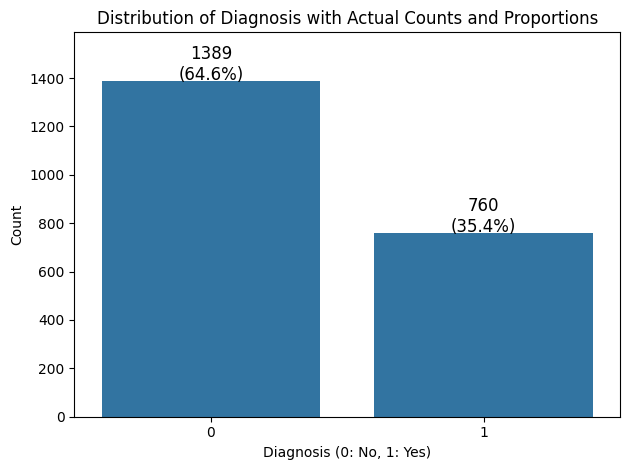

In [13]:
# Count the number of occurrences of each category in 'Diagnosis'
diagnosis_counts = data[target_feature[0]].value_counts()

#Plot the count plot
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)

#Add annotations (actual counts and percentages)
total = len(data)
for i, count in enumerate(diagnosis_counts):
    percentage = f'{(count / total) * 100:.1f}%'
    plt.text(i, count + 5, f'{count}\n({percentage})', ha='center', fontsize=12)

#Customize the plot
plt.title('Distribution of Diagnosis with Actual Counts and Proportions')
plt.xlabel('Diagnosis (0: No, 1: Yes)')
plt.ylabel('Count')
plt.ylim(0, diagnosis_counts.max() + 200)
plt.tight_layout()
plt.show()

*KEY OBSERVATIONS*

The target feature does seem to be a bit imbalanced. As of now I'm proceeding to use it as it is, as I don't know how to decide between undersampling or oversampling.

## NUMERICAL FEATURE ANALYSIS

### ***Statistical Summary***

In [14]:
data.describe()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,27.655697,10.039442,4.920202,4.993138,7.051081,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,4.982958,0.353653
std,8.990221,7.217438,5.757910,2.857191,2.909055,1.763573,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,2.949775,0.478214
min,60.000000,15.008851,0.002003,0.003616,0.009385,4.002629,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.001288,0.000000
25%,67.000000,21.611408,5.139810,2.570626,2.458455,5.482997,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,2.342836,0.000000
50%,75.000000,27.823924,9.934412,4.766424,5.076087,7.115646,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,5.038973,0.000000
75%,83.000000,33.869778,15.157931,7.427899,7.558625,8.562521,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,7.581490,1.000000
max,90.000000,39.992767,19.989293,9.987429,9.998346,9.999840,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,9.999747,1.000000


### ***Uni-variate Analysis***

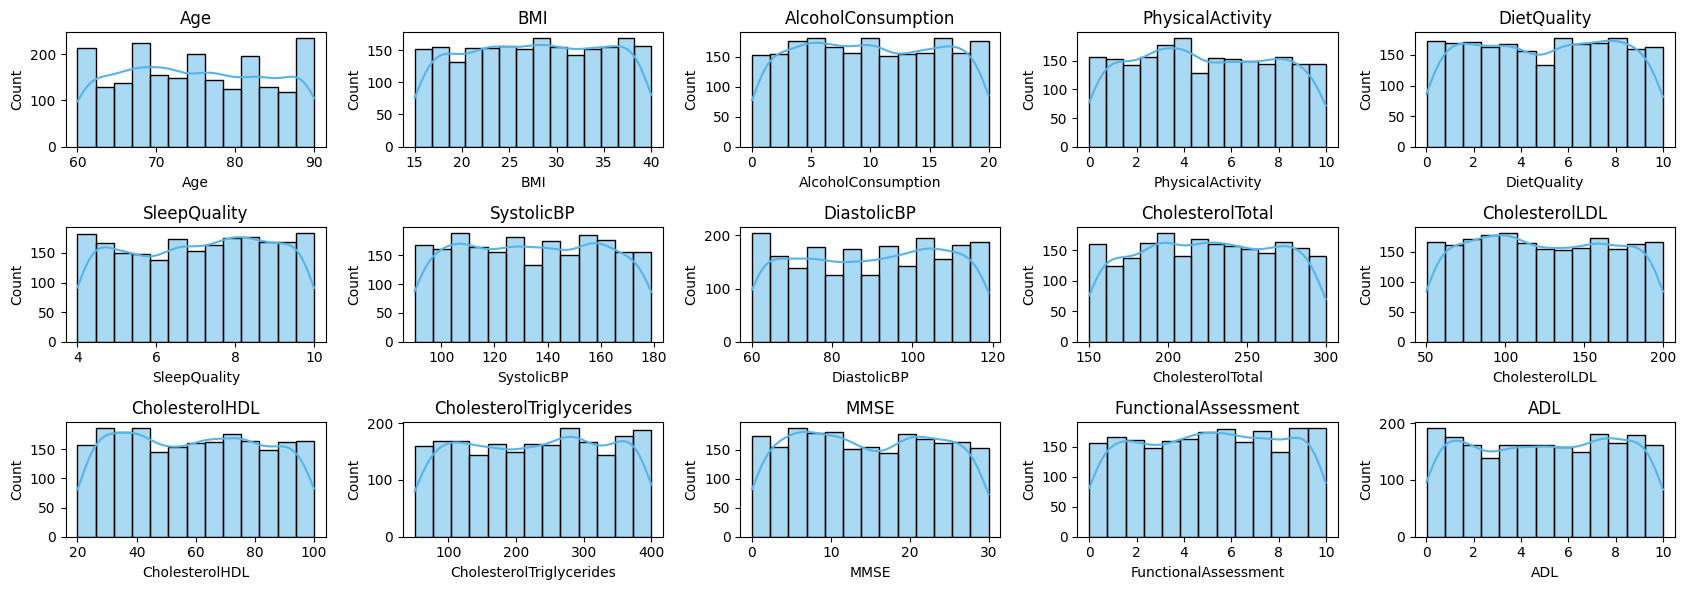

In [15]:
#Initialize the figure
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(17, 6))

#Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numerical features and plot histogram and boxplot
for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], ax=axes[i], color='#56B4E9', kde=True)
    axes[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()

*KEY OBSERVATIONS*

* Almost all the numerical features seem to follow kind of a uniform distribution, with small peaks thorughout.

### ***Bi-variate Analysis***

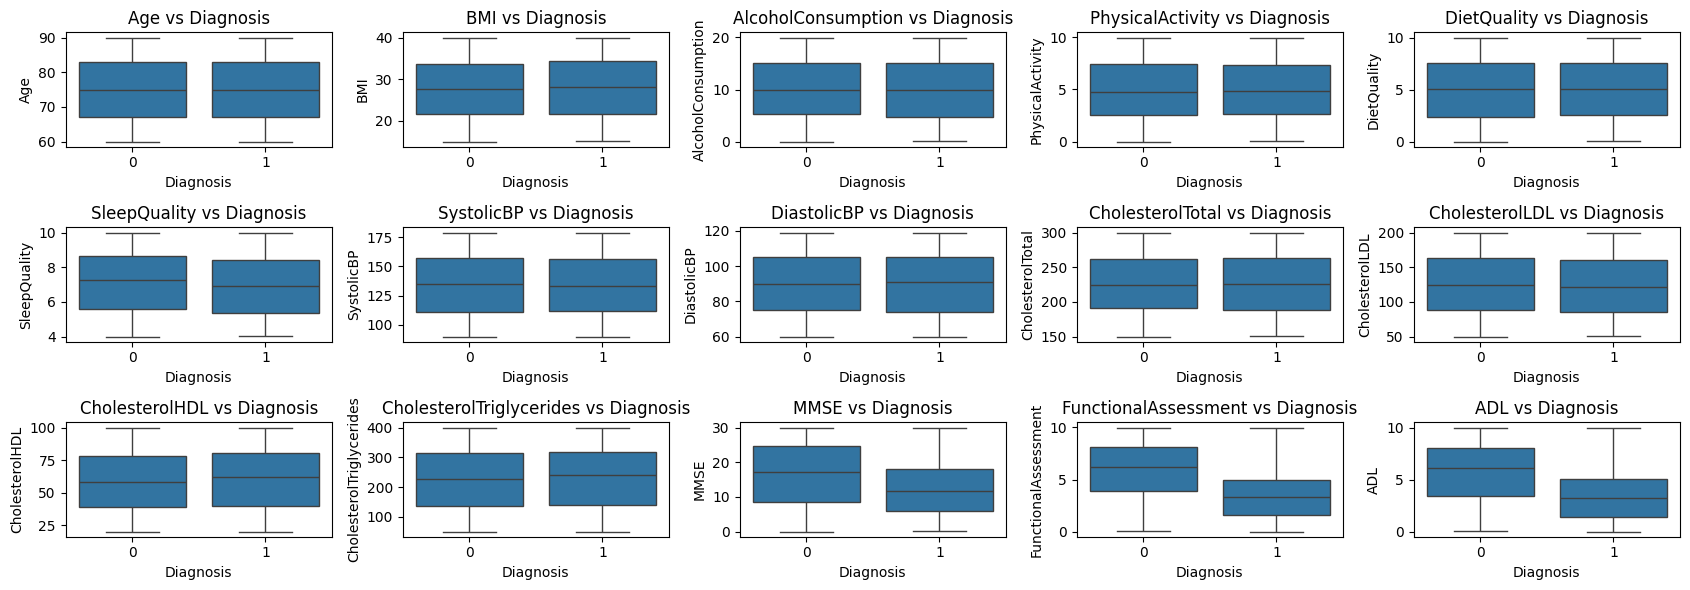

In [16]:
#Initialize the figure
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(17, 6))

#Flatten the axes array for easier indexing
axes = axes.flatten()

#Iterate through the numerical features and plot
for i, feature in enumerate(numerical_features):
        sns.boxplot(x=data[target_feature[0]], y=data[feature], ax=axes[i])
        axes[i].set_title(f'{feature} vs {target_feature[0]}')

plt.tight_layout()
plt.show()

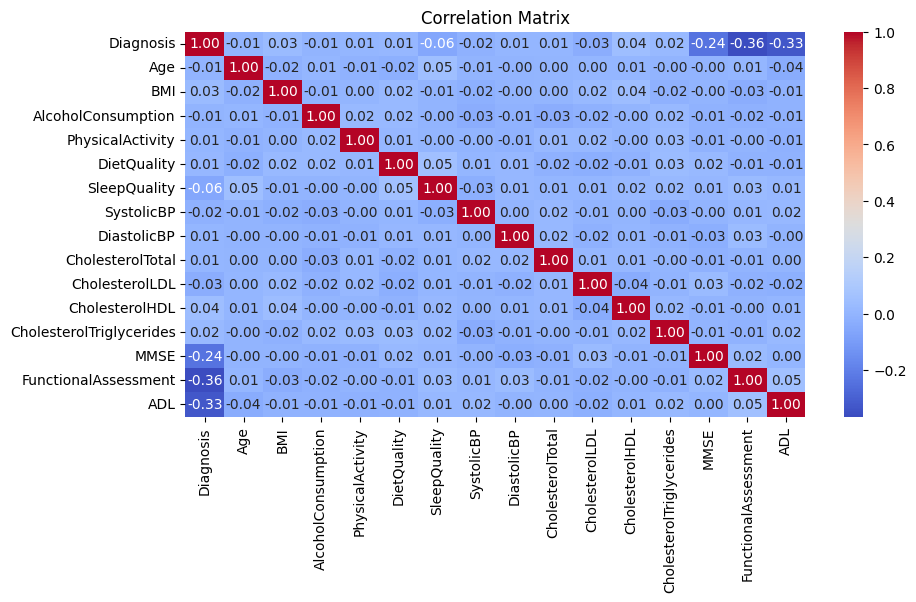

In [17]:
#Add target feature to the list of features for correlation matrix
numerical_target_features = target_feature.copy()
numerical_target_features.extend(numerical_features)

#Compute the correlation matrix
corr_matrix = data[numerical_target_features].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

*KEY OBSERVATIONS*

* From the boxplot and Correlation matrix, it looks like MMSE, FunctionalAssessment and ADL seem to have the most noticeable effect on the Target feature

## CATEGORICAL FEATURE ANALYSIS

### ***Visual Feature Significance Test***

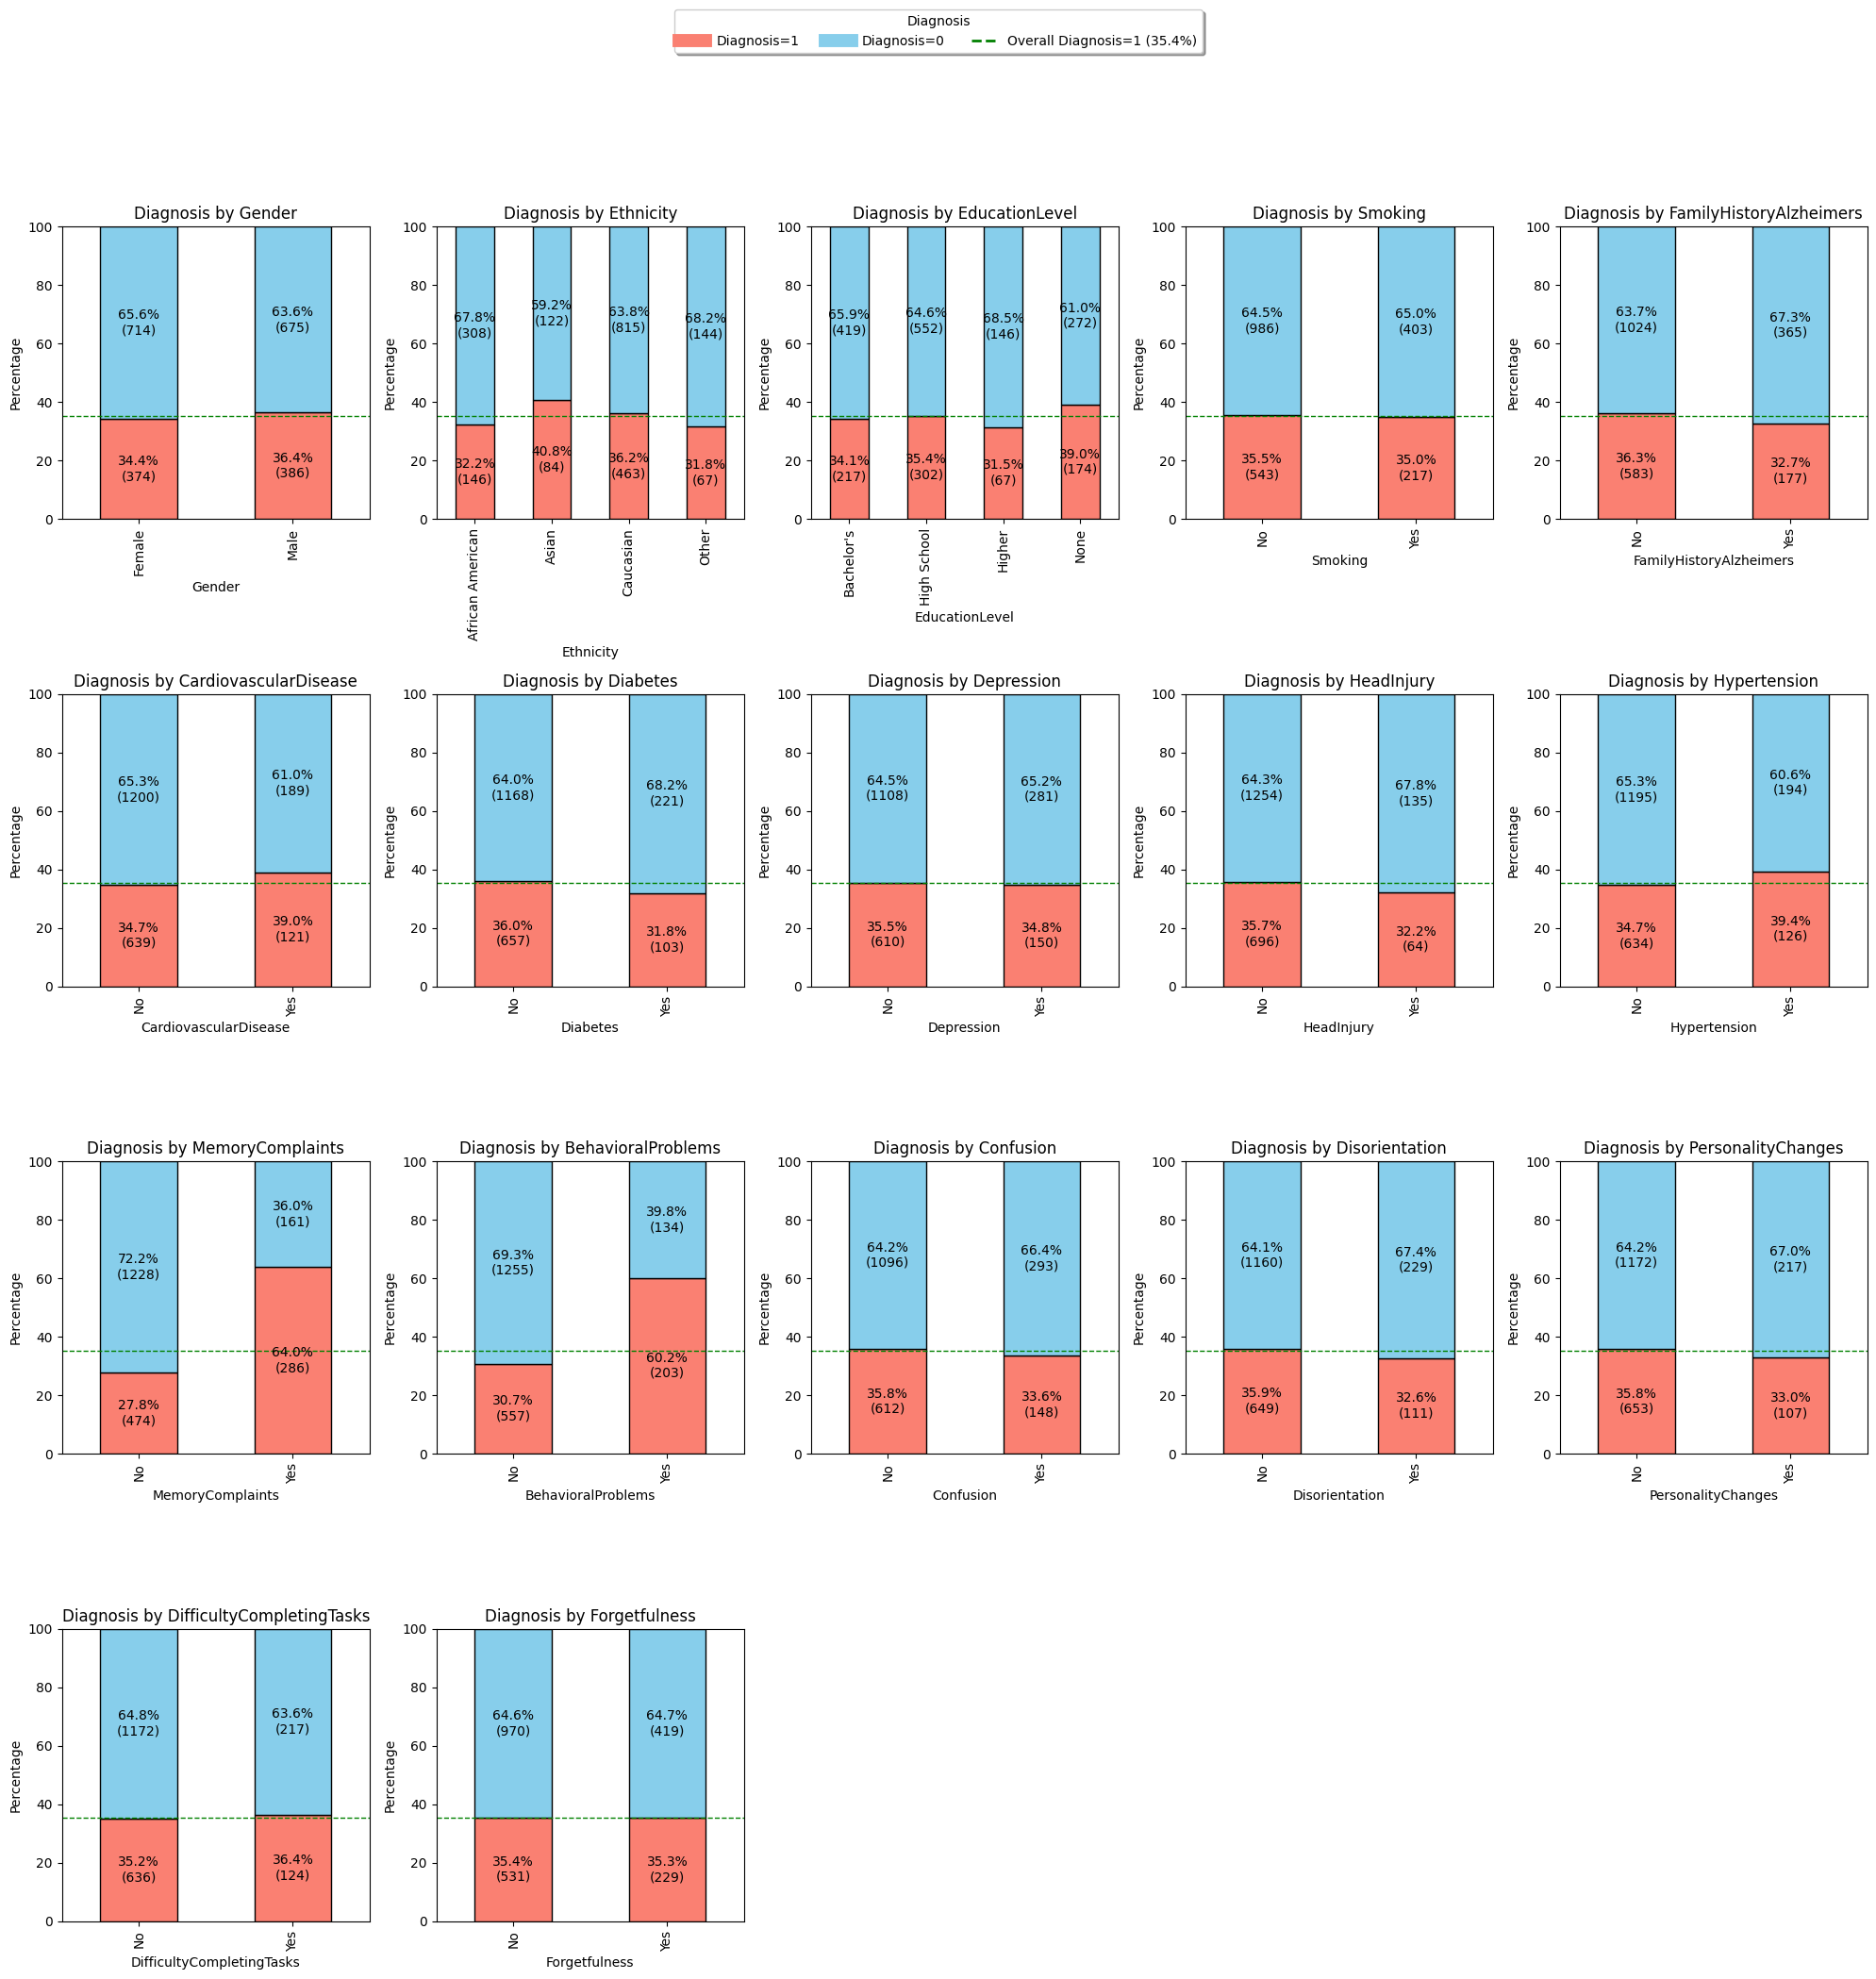

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.lines import Line2D  # For custom legend entries

#Compute overall percentage of Diagnosis == 1 outside the function
overall_percentage = data[target_feature[0]].mean() * 100

#Function to calculate percentages and plot stacked bar charts with additional elements
def plot_stacked_bar(ax, df, feature, target, overall_percentage):
    # Calculate the count and percentage for each target category (0 and 1) across the categorical feature
    diagnosis_counts = df.groupby([feature, target]).size().unstack(fill_value=0)

    #Reorder columns to have Diagnosis=1 first so it appears at the bottom of the stack
    if 1 in diagnosis_counts.columns:
        diagnosis_counts = diagnosis_counts[[1, 0]]
    else:
        diagnosis_counts = diagnosis_counts[[0]]

    #Calculate percentages
    diagnosis_perc = diagnosis_counts.div(diagnosis_counts.sum(axis=1), axis=0) * 100

    #Plot a stacked bar chart with black borders around the bars
    diagnosis_perc.plot(
        kind='bar',
        stacked=True,
        color=['salmon', 'skyblue'],
        ax=ax,
        edgecolor='black',
        legend=False
    )

    #Add a horizontal reference line for the overall average
    ax.axhline(
        y=overall_percentage,
        color='green',
        linestyle='--',
        linewidth=1,
        label=f'Overall Diagnosis=1 ({overall_percentage:.1f}%)'
    )

    #Add labels to show percentages and counts on the bars
    for i in range(diagnosis_perc.shape[0]):
        cumulative_percentage = 0
        for j in range(diagnosis_perc.shape[1]):
            percentage = diagnosis_perc.iloc[i, j]
            count = diagnosis_counts.iloc[i, j]
            y_position = cumulative_percentage + percentage / 2
            ax.text(
                i,
                y_position,
                f'{percentage:.1f}%\n({count})',
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )
            cumulative_percentage += percentage

    #Add title and labels
    ax.set_title(f'{target} by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)

#Determine the number of rows and columns for subplots based on the number of categorical features
n_features = len(categorical_features)

#Dynamically determine the number of columns, aiming for 3 to 5 columns depending on the number of features
n_cols = min(5, max(2, math.ceil(n_features / 3)))  #Choose between 2 to 5 columns dynamically
n_rows = math.ceil(n_features / n_cols)

#Initialize the figure with dynamically calculated rows and columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 5 * n_rows))

#Flatten the axes array if necessary
axes = axes.flatten() if n_features > 1 else [axes]

#Iterate through categorical features and plot stacked bar charts
for i, feature in enumerate(categorical_features):
    plot_stacked_bar(axes[i], data, feature, target_feature[0], overall_percentage)

#Create custom legend entries
custom_lines = [
    Line2D([0], [0], color='salmon', lw=10),
    Line2D([0], [0], color='skyblue', lw=10),
    Line2D([0], [0], color='green', linestyle='--', lw=2)
]
custom_labels = [
    'Diagnosis=1',
    'Diagnosis=0',
    f'Overall Diagnosis=1 ({overall_percentage:.1f}%)'
]

#Create a single legend for the entire figure above the plots
fig.legend(
    handles=custom_lines,
    labels=custom_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    fancybox=True,
    shadow=True,
    ncol=3,
    title=target_feature[0]
)

#Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

#Adjust layout to accommodate the legend at the top
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the bottom margin to make room for the legend
plt.show()


### ***Chi-squared Test***

In [19]:
import pandas as pd
from scipy.stats import chi2_contingency

#Lists to hold the results
features = []
chi2_stats = []
p_values = []
degrees_of_freedom = []

#Loop over each categorical feature
for feature in categorical_features:
    #Create contingency table
    contingency_table = pd.crosstab(data[feature], data[target_feature[0]])

    #Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    #Append the results to the lists
    features.append(feature)
    chi2_stats.append(chi2)
    p_values.append(p)
    degrees_of_freedom.append(dof)

#Create a DataFrame from the results
chi2_results = pd.DataFrame({
    'Feature': features,
    'Chi2 Statistic': chi2_stats,
    'p-value': p_values,
    'Degrees of Freedom': degrees_of_freedom
})

#Sort the results by p-value
chi2_results.sort_values('p-value', inplace=True)

#Filter features with p-value less than 0.05, considering a 95% significance level
significant_features = chi2_results[chi2_results['p-value'] < 0.05]['Feature']
print(f'Significant Features:\n {significant_features}\n')

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
#Display the results
print(chi2_results)



Significant Features:
 10      MemoryComplaints
11    BehavioralProblems
Name: Feature, dtype: object

                      Feature  Chi2 Statistic       p-value  Degrees of Freedom
10           MemoryComplaints      200.623704  1.526605e-45                   1
11         BehavioralProblems      106.879217  4.731447e-25                   1
1                   Ethnicity        6.302089  9.780307e-02                   3
9                Hypertension        2.442487  1.180889e-01                   1
4     FamilyHistoryAlzheimers        2.170309  1.406980e-01                   1
6                    Diabetes        1.953177  1.622450e-01                   1
5       CardiovascularDisease        1.947683  1.628367e-01                   1
2              EducationLevel        4.453147  2.165077e-01                   3
13             Disorientation        1.168140  2.797838e-01                   1
0                      Gender        0.859716  3.538183e-01                   1
8                

*KEY OBSERVATIONS*
* From the visualization as well the Statistical Chi-squared test, the features Memory Complaints and Behavioral Problems seem to be the most significant.
* But I'm not going to drop the other features yet since Chi-square test is only a Uni-variate test and doesn't consider the predictive effect as a result of combination of features.

## OUTLIER DETECTION

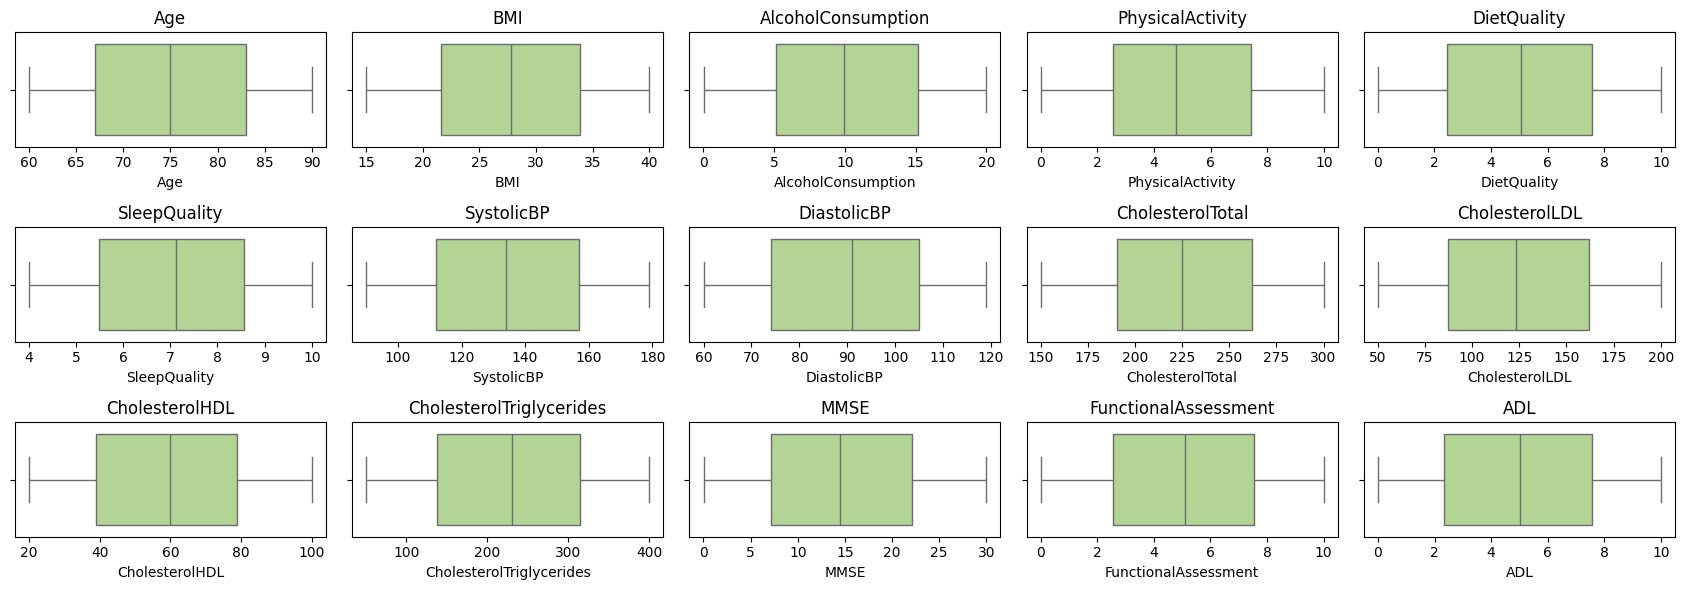

In [20]:
# Initialize the figure
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(17, 6))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numerical features and plot histogram and boxplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data[feature], ax=axes[i], color = '#B2DF8A')
    axes[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()

In [21]:
data_outlier_handled = data

for feature in numerical_features:
    Q1 = data_outlier_handled[feature].quantile(0.25)
    Q3 = data_outlier_handled[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data_outlier_handled[feature] < lower_bound) | (data_outlier_handled[feature] > upper_bound)).sum()
    print(f'{feature} Outliers: {outliers}')
    data_outlier_handled = data_outlier_handled[(data_outlier_handled[feature] >= lower_bound) & (data_outlier_handled[feature] <= upper_bound)]
print(f'Outliers that will be removed if we use IQR on all the above features: {round(((data.shape[0]-data_outlier_handled.shape[0])/data.shape[0])*100,2)}%')

Age Outliers: 0
BMI Outliers: 0
AlcoholConsumption Outliers: 0
PhysicalActivity Outliers: 0
DietQuality Outliers: 0
SleepQuality Outliers: 0
SystolicBP Outliers: 0
DiastolicBP Outliers: 0
CholesterolTotal Outliers: 0
CholesterolLDL Outliers: 0
CholesterolHDL Outliers: 0
CholesterolTriglycerides Outliers: 0
MMSE Outliers: 0
FunctionalAssessment Outliers: 0
ADL Outliers: 0
Outliers that will be removed if we use IQR on all the above features: 0.0%


*KEY OBSERVATIONS*
* Clearly, they are no outliers in the numerical features

## ENCODING FEATURES

In [22]:
#Display unique values
for feature in categorical_features:
  print(f'{feature}: {data[feature].unique()}')

Gender: ['Male' 'Female']
Ethnicity: ['Caucasian' 'Other' 'African American' 'Asian']
EducationLevel: ["Bachelor's" 'None' 'High School' 'Higher']
Smoking: ['No' 'Yes']
FamilyHistoryAlzheimers: ['No' 'Yes']
CardiovascularDisease: ['No' 'Yes']
Diabetes: ['Yes' 'No']
Depression: ['Yes' 'No']
HeadInjury: ['No' 'Yes']
Hypertension: ['No' 'Yes']
MemoryComplaints: ['No' 'Yes']
BehavioralProblems: ['No' 'Yes']
Confusion: ['No' 'Yes']
Disorientation: ['No' 'Yes']
PersonalityChanges: ['No' 'Yes']
DifficultyCompletingTasks: ['Yes' 'No']
Forgetfulness: ['No' 'Yes']


In [23]:
#Generate dummy variables, dropping the most frequent category in each case
data = pd.get_dummies(data, columns = categorical_features, drop_first = True)

#Making the dependent column as the last column
dependent_column = data.pop(target_feature[0])
data[target_feature[0]] = dependent_column
data.head()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,Gender_Male,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other,EducationLevel_High School,EducationLevel_Higher,EducationLevel_None,Smoking_Yes,FamilyHistoryAlzheimers_Yes,CardiovascularDisease_Yes,Diabetes_Yes,Depression_Yes,HeadInjury_Yes,Hypertension_Yes,MemoryComplaints_Yes,BehavioralProblems_Yes,Confusion_Yes,Disorientation_Yes,PersonalityChanges_Yes,DifficultyCompletingTasks_Yes,Forgetfulness_Yes,Diagnosis
0,73,22.927749,13.297218,6.327112,1.347214,9.025679,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,1.725883,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,0
1,89,26.827681,4.542524,7.619885,0.518767,7.151293,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,2.592424,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0
2,73,17.795882,19.555085,7.844988,1.826335,9.673574,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,7.119548,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,0
3,74,33.800817,12.209266,8.428001,7.435604,8.392554,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,6.481226,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,0
4,89,20.716974,18.454356,6.310461,0.795498,5.597238,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0.014691,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,0


# **TRAINING AND TEST SET CREATION**

## TRAIN TEST SPLIT

In [24]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [25]:
X.head()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,Gender_Male,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other,EducationLevel_High School,EducationLevel_Higher,EducationLevel_None,Smoking_Yes,FamilyHistoryAlzheimers_Yes,CardiovascularDisease_Yes,Diabetes_Yes,Depression_Yes,HeadInjury_Yes,Hypertension_Yes,MemoryComplaints_Yes,BehavioralProblems_Yes,Confusion_Yes,Disorientation_Yes,PersonalityChanges_Yes,DifficultyCompletingTasks_Yes,Forgetfulness_Yes
0,73,22.927749,13.297218,6.327112,1.347214,9.025679,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,1.725883,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False
1,89,26.827681,4.542524,7.619885,0.518767,7.151293,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,2.592424,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,73,17.795882,19.555085,7.844988,1.826335,9.673574,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,7.119548,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False
3,74,33.800817,12.209266,8.428001,7.435604,8.392554,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,6.481226,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
4,89,20.716974,18.454356,6.310461,0.795498,5.597238,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0.014691,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False


In [26]:
y.head()

,Diagnosis
0,0
1,0
2,0
3,0
4,0


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1719, 36), (430, 36), (1719,), (430,))

# **FEATURE SCALING**

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Fit the scaler on the training data and transform it
X_train_numerical_scaled = sc.fit_transform(X_train[numerical_features])
# Transform the test data
X_test_numerical_scaled = sc.transform(X_test[numerical_features])

# Convert the scaled numerical features back to DataFrames
X_train_numerical_scaled = pd.DataFrame(X_train_numerical_scaled, columns=numerical_features, index=X_train.index)
X_test_numerical_scaled = pd.DataFrame(X_test_numerical_scaled, columns=numerical_features, index=X_test.index)

# Replace the numerical features in X_train and X_test with the scaled values
X_train[numerical_features] = X_train_numerical_scaled
X_test[numerical_features] = X_test_numerical_scaled


In [29]:
X_train.head()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,Gender_Male,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other,EducationLevel_High School,EducationLevel_Higher,EducationLevel_None,Smoking_Yes,FamilyHistoryAlzheimers_Yes,CardiovascularDisease_Yes,Diabetes_Yes,Depression_Yes,HeadInjury_Yes,Hypertension_Yes,MemoryComplaints_Yes,BehavioralProblems_Yes,Confusion_Yes,Disorientation_Yes,PersonalityChanges_Yes,DifficultyCompletingTasks_Yes,Forgetfulness_Yes
443,-1.119175,0.278340,-0.819457,-1.359253,1.322262,-0.283932,0.747986,0.687817,-1.218445,-0.814186,-0.816799,1.586686,-0.619283,0.961917,0.907178,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False,False
676,1.433396,-0.407230,1.588139,-0.743916,-0.456405,-1.359111,-0.319628,0.631272,0.934483,0.219496,-0.765557,1.196645,-0.713488,1.643751,0.657294,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
440,-0.120343,-1.337961,-0.226203,0.375355,0.756613,0.867357,-1.616015,-0.556174,1.333270,1.316046,-1.144223,1.674692,0.455591,1.401311,1.368193,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
1070,-0.453287,0.277972,-1.136542,-1.226627,-0.299308,1.562680,-0.205240,0.405092,1.281124,0.577847,1.465508,0.214742,1.055873,-0.513354,-1.184171,True,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False
1977,-1.008194,-0.101865,-0.162039,-0.095728,-0.749525,0.967303,0.862373,1.535993,-1.728780,0.704150,0.944965,0.124344,-0.478281,1.277059,0.164089,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False


In [30]:
X_test.head()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,Gender_Male,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other,EducationLevel_High School,EducationLevel_Higher,EducationLevel_None,Smoking_Yes,FamilyHistoryAlzheimers_Yes,CardiovascularDisease_Yes,Diabetes_Yes,Depression_Yes,HeadInjury_Yes,Hypertension_Yes,MemoryComplaints_Yes,BehavioralProblems_Yes,Confusion_Yes,Disorientation_Yes,PersonalityChanges_Yes,DifficultyCompletingTasks_Yes,Forgetfulness_Yes
1682,1.433396,-1.298679,0.308997,1.260918,-0.017600,0.130867,0.023534,-0.216904,-0.396849,-1.256889,1.453027,1.486508,0.637565,0.370079,0.707717,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
1758,-1.452119,-0.549886,-1.541714,-1.465273,-0.551163,1.438964,-1.539757,1.196722,-0.542633,0.300456,-0.758197,-0.261512,0.418331,0.189899,-0.331270,True,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False
477,0.212601,0.375635,0.799184,1.135204,-1.357786,1.073407,1.205535,-0.669265,-0.350365,1.198794,-1.492241,1.306100,1.560634,0.418961,0.652989,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
259,0.101620,-0.499819,0.641220,0.963125,0.709483,1.296344,-0.472144,1.422903,-1.384618,-0.649092,-0.726739,1.345908,1.754192,1.150234,-0.626829,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1709,0.101620,0.196235,0.067827,0.658469,-1.622621,1.589428,1.548696,1.196722,-0.790939,0.738854,-1.058207,0.255935,0.500486,0.672130,-1.572864,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True


# **MODEL BUILDING**

##SCORE METRICS INITIALIZATION

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
import time

#Define a function to calculate the score metrics
def cross_val_score_func(model, X_train, y_train):
  score = cross_val_score(estimator = model, X= X_train, y = y_train, scoring = 'accuracy', cv = 10)
  return score

# Create a DataFrame to store the model metrics with correct dtypes
metrics_df = pd.DataFrame({
    "Model": pd.Series(dtype="object"),
    "Accuracy": pd.Series(dtype="float"),
    "Execution Time (s)": pd.Series(dtype="float")
})

## MODELS

### ***Logistic Regression - All Features***

In [32]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [33]:
import statsmodels.api as sm

#Start the timer
start_time = time.time()

#Prepare the data
X_train_sm = X_train.copy()
y_train_sm = y_train.copy()

#Convert boolean columns in X_train_sm to integers (0 and 1), since the stats models only expects numeric data
bool_cols_X = X_train_sm.select_dtypes(include=['bool']).columns
X_train_sm[bool_cols_X] = X_train_sm[bool_cols_X].astype(int)

#Add a constant term for the intercept
X_train_sm = sm.add_constant(X_train_sm)

# Fit the logistic regression model
logit_model = sm.Logit(y_train_sm, X_train_sm)
model = logit_model.fit()

# Predict on the training data
y_pred_probs = model.predict(X_train_sm)
# Convert probabilities to class labels (threshold at 0.5)
y_pred = (y_pred_probs >= 0.5).astype(int)

# Calculate accuracy
Accuracy = accuracy_score(y_train_sm, y_pred)

#End the timer
end_time = time.time()

#Calculate the elapsed time (in seconds)
execution_time = round(end_time - start_time, 3)

#Add a new row with the metrics
new_model_metrics = {
    'Model': 'Logit - All features',
    'Accuracy': round(Accuracy*100,3),
    'Execution Time (s)': execution_time
}

#Convert the dictionary to a DataFrame
new_model_metrics_df = pd.DataFrame([new_model_metrics])

#Check if metrics_df is empty
if metrics_df.empty:
    metrics_df = new_model_metrics_df
else:
    #Concatenate the new row to the existing metrics DataFrame
    metrics_df = pd.concat([metrics_df, new_model_metrics_df], ignore_index=True)

#Display the DataFrame
print('\n')
metrics_df

Optimization terminated successfully.
         Current function value: 0.372706
         Iterations 7




,Model,Accuracy,Execution Time (s)
0,Logit - All features,84.177,0.07


### ***Selecting Significant Features***

In [34]:
#Create a DataFrame with coefficients and p-values
summary_table = pd.DataFrame({
    'Feature': model.params.index,
    'Coefficient': model.params.values,
    'Std.Err': model.bse.values,
    'z-value': model.tvalues.values,
    'p-value': model.pvalues.values
})

#Calculate Odds Ratios
summary_table['Odds Ratio'] = np.exp(model.params.values)

#Reorder columns
summary_table = summary_table[['Feature', 'Coefficient', 'Odds Ratio', 'Std.Err', 'z-value', 'p-value']]

#Sort the summary table by p-value in ascending order
summary_table.sort_values('p-value', inplace=True)

#Display the summary table
print(summary_table)


                          Feature  Coefficient  Odds Ratio   Std.Err    z-value       p-value
14           FunctionalAssessment    -1.223813    0.294107  0.083932 -14.580995  3.710664e-48
15                            ADL    -1.189048    0.304511  0.083418 -14.254077  4.228552e-46
30           MemoryComplaints_Yes     2.533532   12.597917  0.184578  13.726047  7.089735e-43
31         BehavioralProblems_Yes     2.502303   12.210581  0.204519  12.235089  2.018842e-34
13                           MMSE    -0.923030    0.397313  0.078956 -11.690476  1.425851e-31
0                           const    -2.222379    0.108351  0.254914  -8.718145  2.827977e-18
11                 CholesterolHDL     0.122037    1.129796  0.071094   1.716559  8.605971e-02
28                 HeadInjury_Yes    -0.387365    0.678843  0.250666  -1.545343  1.222634e-01
17                Ethnicity_Asian     0.432053    1.540417  0.281699   1.533741  1.250933e-01
10                 CholesterolLDL    -0.108494    0.897184  

*KEY OBSERVATIONS*
* It looks like only FunctionalAssessment, ADL, MemoryComplaints_Yes, BehavioralProblems_Yes and MMSE seem to be the most significant given their p-value<0.05.
* But let's perform backward elimination to confirm that

In [35]:
#Backward elimination
import statsmodels.api as sm
import pandas as pd
import numpy as np

def backward_elimination(X, y, significance_level=0.05):
   #Perform backward elimination for logistic regression.

    X = X.copy()
    y = y.copy()

    # Add intercept term if not present
    if 'const' not in X.columns:
        X = sm.add_constant(X)

    # Ensure all variables are numeric
    for col in X.columns:
        if X[col].dtype == 'bool':
            X[col] = X[col].astype(int)
    if y.dtype == 'bool':
        y = y.astype(int)

    selected_features = list(X.columns)
    iteration = 0

    while True:
        iteration += 1
        # Fit the model with the current set of features
        model = sm.Logit(y, X[selected_features]).fit(disp=0)

        # Get the p-values for the predictors
        p_values = model.pvalues.iloc[1:]  # Exclude intercept
        max_p_value = p_values.max()       # Highest p-value
        if max_p_value > significance_level:
            # Remove the predictor with the highest p-value
            excluded_feature = p_values.idxmax()
            selected_features.remove(excluded_feature)
            print(f"Iteration {iteration}: Dropped '{excluded_feature}' with p-value {max_p_value:.4f}")
        else:
            break  # Exit loop if all p-values are below the significance level

    #Fit the final model
    model = sm.Logit(y, X[selected_features]).fit(disp=0)
    print("\nBackward Elimination Completed.")
    print(f"Selected features: {selected_features}\n")
    print(model.summary())

    return model, selected_features

#Convert boolean columns to integers if necessary
bool_cols_X = X_train.select_dtypes(include=['bool']).columns
X_train[bool_cols_X] = X_train[bool_cols_X].astype(int)

#Convert target variable if it's boolean
if y_train.dtype == 'bool':
    y_train = y_train.astype(int)

#Run backward elimination
model, selected_features = backward_elimination(X_train, y_train, significance_level=0.05)

#Display the selected features
print("\nFinal selected features after backward elimination:")
for feature in selected_features:
    print(feature)

Iteration 1: Dropped 'EducationLevel_High School' with p-value 0.9464
Iteration 2: Dropped 'Diabetes_Yes' with p-value 0.9113
Iteration 3: Dropped 'PhysicalActivity' with p-value 0.9090
Iteration 4: Dropped 'FamilyHistoryAlzheimers_Yes' with p-value 0.9001
Iteration 5: Dropped 'DietQuality' with p-value 0.8928
Iteration 6: Dropped 'BMI' with p-value 0.8603
Iteration 7: Dropped 'PersonalityChanges_Yes' with p-value 0.8525
Iteration 8: Dropped 'Ethnicity_Other' with p-value 0.8141
Iteration 9: Dropped 'Depression_Yes' with p-value 0.7695
Iteration 10: Dropped 'SystolicBP' with p-value 0.6894
Iteration 11: Dropped 'CholesterolTotal' with p-value 0.6872
Iteration 12: Dropped 'Gender_Male' with p-value 0.6911
Iteration 13: Dropped 'DifficultyCompletingTasks_Yes' with p-value 0.6595
Iteration 14: Dropped 'Forgetfulness_Yes' with p-value 0.5784
Iteration 15: Dropped 'SleepQuality' with p-value 0.5361
Iteration 16: Dropped 'CardiovascularDisease_Yes' with p-value 0.5149
Iteration 17: Dropped '

*KEY OBSERVATIONS*
* Backward elimination does confirm that it is only those 5 features that are statistically significant, so we are going to continue modelling only using those 5 features.

In [36]:
selected_features = ['MMSE','FunctionalAssessment','ADL','MemoryComplaints_Yes','BehavioralProblems_Yes']
#Keep only the selected features in X_train and X_test
X_train = X_train[selected_features].copy()
X_test = X_test[selected_features].copy()

In [37]:
X_train.head()

,MMSE,FunctionalAssessment,ADL,MemoryComplaints_Yes,BehavioralProblems_Yes
443,-0.619283,0.961917,0.907178,0,1
676,-0.713488,1.643751,0.657294,0,0
440,0.455591,1.401311,1.368193,0,0
1070,1.055873,-0.513354,-1.184171,0,0
1977,-0.478281,1.277059,0.164089,0,0


### ***Logistic Regression - Significant Features***

In [38]:
from sklearn.linear_model import LogisticRegression

#Start the timer
start_time = time.time()

#Fit Model
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

#Calculate metrics
Accuracy = cross_val_score_func(model, X_train, y_train)

#End the timer
end_time = time.time()

#Calculate the elapsed time (in seconds)
execution_time = round(end_time - start_time, 3)

#Add a new row with the metrics
new_model_metrics = {
    "Model": model.__class__.__name__,
    "Accuracy": round(Accuracy.mean()*100,3),
    "Standard Deviation": round(Accuracy.std()*100,3),
    "Execution Time (s)": execution_time
}

#Convert the dictionary to a DataFrame
new_model_metrics_df = pd.DataFrame([new_model_metrics])

#Check if metrics_df is empty
if metrics_df.empty:
    metrics_df = new_model_metrics_df
else:
    #Concatenate the new row to the existing metrics DataFrame
    metrics_df = pd.concat([metrics_df, new_model_metrics_df], ignore_index=True)

#Display the DataFrame
metrics_df

,Model,Accuracy,Execution Time (s),Standard Deviation
0,Logit - All features,84.177,0.070,NaN
1,LogisticRegression,84.235,0.149,1.714


### ***Random Forest Classifier***

In [39]:
from sklearn.ensemble import RandomForestClassifier

#Start the timer
start_time = time.time()

#Fit Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

#Calculate metrics
Accuracy = cross_val_score_func(model, X_train, y_train)

#End the timer
end_time = time.time()

#Calculate the elapsed time (in seconds)
execution_time = round(end_time - start_time, 3)

#Add a new row with the metrics
new_model_metrics = {
    "Model": model.__class__.__name__,
    "Accuracy": round(Accuracy.mean()*100,3),
    "Standard Deviation": round(Accuracy.std()*100,3),
    "Execution Time (s)": execution_time
}

#Convert the dictionary to a DataFrame
new_model_metrics_df = pd.DataFrame([new_model_metrics])

#Check if metrics_df is empty
if metrics_df.empty:
    metrics_df = new_model_metrics_df
else:
    #Concatenate the new row to the existing metrics DataFrame
    metrics_df = pd.concat([metrics_df, new_model_metrics_df], ignore_index=True)

#Display the DataFrame
metrics_df

,Model,Accuracy,Execution Time (s),Standard Deviation
0,Logit - All features,84.177,0.070,NaN
1,LogisticRegression,84.235,0.149,1.714
2,RandomForestClassifier,94.647,4.024,1.801


### ***XGBoost***

In [40]:
import xgboost as xgb

#Start the timer
start_time = time.time()

#Fit Model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

#Calculate metrics
Accuracy = cross_val_score_func(model, X_train, y_train)

#End the timer
end_time = time.time()

#Calculate the elapsed time (in seconds)
execution_time = round(end_time - start_time, 3)

#Add a new row with the metrics
new_model_metrics = {
    "Model": model.__class__.__name__,
    "Accuracy": round(Accuracy.mean()*100,3),
    "Standard Deviation": round(Accuracy.std()*100,3),
    "Execution Time (s)": execution_time
}

#Convert the dictionary to a DataFrame
new_model_metrics_df = pd.DataFrame([new_model_metrics])

#Check if metrics_df is empty
if metrics_df.empty:
    metrics_df = new_model_metrics_df
else:
    #Concatenate the new row to the existing metrics DataFrame
    metrics_df = pd.concat([metrics_df, new_model_metrics_df], ignore_index=True)

#Display the DataFrame
metrics_df

,Model,Accuracy,Execution Time (s),Standard Deviation
0,Logit - All features,84.177,0.070,NaN
1,LogisticRegression,84.235,0.149,1.714
2,RandomForestClassifier,94.647,4.024,1.801
3,XGBClassifier,94.007,1.106,1.608


### ***Light GBM***

In [41]:
import lightgbm as lgb

#Start the timer
start_time = time.time()

#Fit Model
model = lgb.LGBMClassifier(verbosity=0)
model.fit(X_train, y_train)

#Calculate metrics
Accuracy = cross_val_score_func(model, X_train, y_train)

#End the timer
end_time = time.time()

#Calculate the elapsed time (in seconds)
execution_time = round(end_time - start_time, 3)

#Add a new row with the metrics
new_model_metrics = {
    "Model": model.__class__.__name__,
    "Accuracy": round(Accuracy.mean()*100,3),
    "Standard Deviation": round(Accuracy.std()*100,3),
    "Execution Time (s)": execution_time
}

#Convert the dictionary to a DataFrame
new_model_metrics_df = pd.DataFrame([new_model_metrics])

#Check if metrics_df is empty
if metrics_df.empty:
    metrics_df = new_model_metrics_df
else:
    #Concatenate the new row to the existing metrics DataFrame
    metrics_df = pd.concat([metrics_df, new_model_metrics_df], ignore_index=True)

#Display the DataFrame
metrics_df

,Model,Accuracy,Execution Time (s),Standard Deviation
0,Logit - All features,84.177,0.070,NaN
1,LogisticRegression,84.235,0.149,1.714
2,RandomForestClassifier,94.647,4.024,1.801
3,XGBClassifier,94.007,1.106,1.608
4,LGBMClassifier,93.658,1.376,1.239


### ***Cat Boost***

In [42]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [43]:
import catboost as cb

#Start the timer
start_time = time.time()

#Fit Model
model = cb.CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

#Calculate metrics
Accuracy = cross_val_score_func(model, X_train, y_train)

#End the timer
end_time = time.time()

#Calculate the elapsed time (in seconds)
execution_time = round(end_time - start_time, 3)

#Add a new row with the metrics
new_model_metrics = {
    "Model": model.__class__.__name__,
    "Accuracy": round(Accuracy.mean()*100,3),
    "Standard Deviation": round(Accuracy.std()*100,3),
    "Execution Time (s)": execution_time
}

#Convert the dictionary to a DataFrame
new_model_metrics_df = pd.DataFrame([new_model_metrics])

#Check if metrics_df is empty
if metrics_df.empty:
    metrics_df = new_model_metrics_df
else:
    #Concatenate the new row to the existing metrics DataFrame
    metrics_df = pd.concat([metrics_df, new_model_metrics_df], ignore_index=True)

#Display the DataFrame
metrics_df

,Model,Accuracy,Execution Time (s),Standard Deviation
0,Logit - All features,84.177,0.070,NaN
1,LogisticRegression,84.235,0.149,1.714
2,RandomForestClassifier,94.647,4.024,1.801
3,XGBClassifier,94.007,1.106,1.608
4,LGBMClassifier,93.658,1.376,1.239
5,CatBoostClassifier,94.879,51.322,1.824


### ***Model Results***

In [44]:
metrics_df

,Model,Accuracy,Execution Time (s),Standard Deviation
0,Logit - All features,84.177,0.070,NaN
1,LogisticRegression,84.235,0.149,1.714
2,RandomForestClassifier,94.647,4.024,1.801
3,XGBClassifier,94.007,1.106,1.608
4,LGBMClassifier,93.658,1.376,1.239
5,CatBoostClassifier,94.879,51.322,1.824


*KEY OBSERVATIONS*

* Cat Boost classifer seem to have performed the best out of all the model with a training set K-fold cross validation accuracy 94.879%.
* We will use this model to predict the test set and hypertune it.

## TEST SET PREDICTION

In [45]:
#Predict X_test using the best performing model - Cat Boost Classifier
model = cb.CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
y_pred_probs = model.predict(X_test)  # Predicted values are in log scale
#Convert probabilities to class labels (threshold at 0.5)
y_pred = (y_pred_probs >= 0.5).astype(int)

# **MODEL EVALUATION**

## PREDICTION METRICS

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[261,   6],
       [  9, 154]])

In [47]:
# Now calculate the accuracy metric using the original y_test and the transformed predictions
Accuracy = accuracy_score(y_test, y_pred)

print("Test results prediction metrics:")
print("Accuracy: {:.3f}".format(Accuracy*100))

Test results prediction metrics:
Accuracy: 96.512


## HYPERTUNING - GRID SEARCH

In [48]:
from sklearn.model_selection import GridSearchCV

# Initialize XGBoost model
model = cb.CatBoostClassifier(verbose=0)

# Define parameter grid
parameters = {
    'iterations': [100, 200],                  #The number of times the model learns from the data (more iterations can improve accuracy but may take longer).
    'depth': [4, 6, 8],                        #How deep each decision tree is allowed to grow (deeper trees capture more detail but may overfit).
    'learning_rate': [0.01, 0.05, 0.1],        #How fast the model updates itself after each learning step (smaller values are slower but safer, larger values are faster but risk missing the best result).
    'l2_leaf_reg': [1, 3, 5],                  #A safety control that prevents the model from becoming too specialized to the training data.
    'random_strength': [0,5,10]                #How much randomness is added to the model's decisions to prevent it from memorizing the data too closely.
}

# Set up the grid search
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           verbose=1, #Controls the level of output during the grid search. verbose=1: shows basic progress messages
                           n_jobs=-1) #Number of CPU cores to use for parallel computation. n_jobs=-1 utilizes all available cores for faster computation.

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("\nBest parameters found: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


Fitting 10 folds for each of 162 candidates, totalling 1620 fits

Best parameters found:  {'depth': 4, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.05, 'random_strength': 0}
Best Accuracy:  0.9534475724194207


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## HYPERTUNED METRICS

In [49]:
# Use the best model to predict on the test set
best_model = grid_search.best_estimator_
y_pred_probs = best_model.predict(X_test)
y_pred = (y_pred_probs >= 0.5).astype(int)

# Evaluate the performance
Accuracy = accuracy_score(y_test, y_pred)

print("Hypertuned Test results prediction metrics:")
print("Accuracy: {:.3f}".format(Accuracy*100))

Hypertuned Test results prediction metrics:
Accuracy: 96.744


### ***Test Prediction Vizualized***

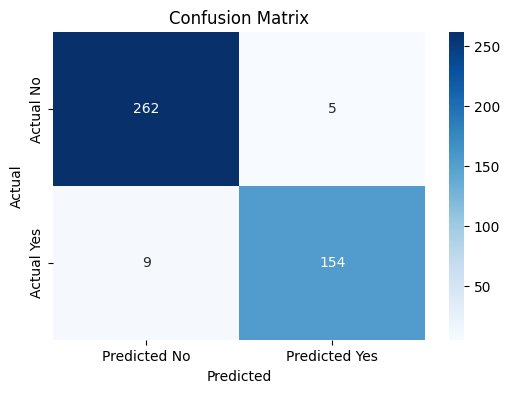

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# **SUMMARY**

* A Hypertuned Cat Boost model seem to have performed the best out of all models tested with a Accuracy score of 96.744% on a true test set.
* Only the following 5 features were selected for modelling as they were the most statistically significant features:
  
  -MMSE
  
  -Functional Assessment
  
  -ADL
  
  -Memory Complaints
  
  -Behavioral Problems

* The target feature was imbalanced with only 35% of positive diagnosis as opposite to 65% of negative. The model was trained using the imbalanced dataset as is, since I didn't know to decide between using any oversampling or undersampling techniques.

# **MODEL PIPELINE**

In [51]:
!pip install catboost

In [52]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [53]:
org_data = pd.read_csv('alzheimers_disease_data.csv')
data = org_data

In [54]:
#Define the features
target_feature = ['Diagnosis']
numerical_features = ['MMSE','FunctionalAssessment','ADL']
categorical_features = ['MemoryComplaints','BehavioralProblems']
#Rearrange the dataset
data = data[numerical_features+categorical_features+target_feature]
data.head()

,MMSE,FunctionalAssessment,ADL,MemoryComplaints,BehavioralProblems,Diagnosis
0,21.463532,6.518877,1.725883,0,0,0
1,20.613267,7.118696,2.592424,0,0,0
2,7.356249,5.895077,7.119548,0,0,0
3,13.991127,8.965106,6.481226,0,1,0
4,13.517609,6.045039,0.014691,0,0,0


In [55]:
#Separate data into X and y
X = data.drop(columns=target_feature)
y = data[target_feature]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [56]:
# Combine both encoding and scaling in a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scaling for numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), categorical_features)
    ]
)

In [57]:
#To see the input to the model
#Fit the preprocessor on the training data
X_train_transformed = preprocessor.fit_transform(X_train)

#Get numerical feature names (they remain the same)
num_columns = numerical_features

#Get the names of the one-hot encoded categorical columns
cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

#Combine numerical and categorical feature names
all_columns = np.concatenate([num_columns, cat_columns])

#Convert the transformed data to a DataFrame for easy inspection
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_columns)

#Display the transformed data
print("Transformed Data after Encoding and Scaling:")
X_train_transformed_df.head()

Transformed Data after Encoding and Scaling:


,MMSE,FunctionalAssessment,ADL,MemoryComplaints_1,BehavioralProblems_1
0,-0.619283,0.961917,0.907178,0.0,1.0
1,-0.713488,1.643751,0.657294,0.0,0.0
2,0.455591,1.401311,1.368193,0.0,0.0
3,1.055873,-0.513354,-1.184171,0.0,0.0
4,-0.478281,1.277059,0.164089,0.0,0.0


In [58]:
#Define the model
model = cb.CatBoostClassifier(
    verbose = 0,
    iterations = 100,
    depth= 4,
    learning_rate = 0.05,
    l2_leaf_reg = 1,
    random_strength = 0
)

In [59]:
#Build the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Combined preprocessing
    ('model', model)  # Cat Boost model
])

In [60]:
#Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['MMSE',
                                                   'FunctionalAssessment',
                                                   'ADL']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['MemoryComplaints',
                                                   'BehavioralProblems'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x7d3768e9e590>)])

In [61]:
#Make predictions
y_pred_probs = pipeline.predict(X_test)
y_pred = (y_pred_probs >= 0.5).astype(int)

In [62]:
#Calculate prediction metrics
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: {:.3f}".format(Accuracy*100))

Accuracy on test set: 96.744


In [63]:
X_test_predictions = X_test.copy()
# Combine X_test, y_test, and y_pred into one DataFrame for export
X_test_predictions['y_test'] = y_test
X_test_predictions['y_pred'] = y_pred
#Exporting the test sets for testing the model pipeline that will be exported in a new VS code file
X_test_predictions.to_csv('X_test_predictions.csv',index=False)

In [64]:
#Export Model
joblib.dump(pipeline, 'Alzheimers_Model_Pipeline_Mari.pkl')

['Alzheimers_Model_Pipeline_Mari.pkl']